In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import ast
import scipy.sparse as sps
import seaborn as sns
%matplotlib inline

In [319]:
# load the rating dataset
ratings_df_raw = pd.read_csv('data1/ratings.csv')
ratings_df = ratings_df_raw.copy()
ratings_df.shape

(100004, 4)

In [296]:
#cast unix time to readable time
ratings_df['timestamp'] = [datetime.datetime.fromtimestamp(dt) for dt in ratings_df['timestamp'].values]
ratings_df['timestamp'].describe()

count                  100004
unique                  78141
top       2016-07-23 08:54:42
freq                       87
first     1995-01-09 06:46:49
last      2016-10-16 13:57:24
Name: timestamp, dtype: object

In [297]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,2009-12-13 21:52:24
1,1,1029,3.0,2009-12-13 21:52:59
2,1,1061,3.0,2009-12-13 21:53:02
3,1,1129,2.0,2009-12-13 21:53:05
4,1,1172,4.0,2009-12-13 21:53:25


In [324]:
# load movies dataset
movies_df_raw = pd.read_csv('data1/movies.csv')
movies_df = movies_df_raw.copy()
print('Shape:', movies_df.shape)
movies_df['title'].nunique()
movies_df

Shape: (9125, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


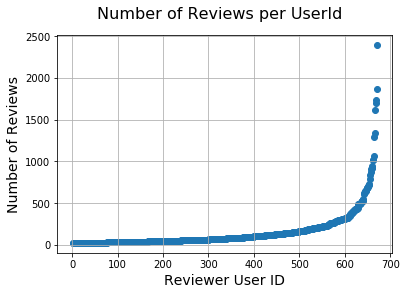

In [299]:
# rating data set exploration
# plot reviews per user
plt.scatter(ratings_df['userId'].unique(), ratings_df['userId'].value_counts(normalize=False).sort_values())
plt.suptitle('Number of Reviews per UserId', fontsize=16)
plt.xlabel('Reviewer User ID', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.grid()

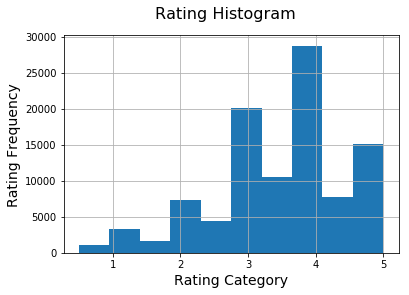

In [300]:
#distribution of ratings
ratings_df['rating'].plot.hist()
plt.suptitle('Rating Histogram', fontsize=16)
plt.xlabel('Rating Category', fontsize=14)
plt.ylabel('Rating Frequency', fontsize=14)
plt.grid()

In [303]:
# we now clean the dataset

# remove any movies not found in the ratings set
movies_df_raw = movies_df_raw[movies_df_raw['movieId'].isin(ratings_df_raw['movieId'])]
movies_df_raw.tail()

movies_df_raw = movies_df_raw.reset_index(drop=True)
movies_df_raw['movieId_new'] = movies_df_raw.index
movies_df_raw.tail()

,movieId,title,genres,movieId_new
9061,161944,The Last Brickmaker in America (2001),Drama,9061
9062,162376,Stranger Things,Drama,9062
9063,162542,Rustom (2016),Romance|Thriller,9063
9064,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,9064
9065,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,9065


In [304]:
# clean the rating dataset
ratings_df_raw = ratings_df_raw[['userId', 'movieId', 'rating']]
# we merge two dataset to find movies that have ratings
ratings_df_raw = ratings_df_raw.merge(movies_df_raw[['movieId', 'movieId_new', 'title']], on='movieId', how='inner') 
ratings_df_raw = ratings_df_raw[['userId',  'movieId_new', 'rating', 'title']]
ratings_df_raw.columns = ['userId',  'movieId', 'rating', 'title']

# clean up userids to start at 0 not 1
ratings_df_raw['userId'] -= 1
ratings_df = ratings_df_raw.copy()
ratings_df.head()


,userId,movieId,rating,title
0,0,30,2.5,Dangerous Minds (1995)
1,6,30,3.0,Dangerous Minds (1995)
2,30,30,4.0,Dangerous Minds (1995)
3,31,30,4.0,Dangerous Minds (1995)
4,35,30,3.0,Dangerous Minds (1995)


In [305]:
a = pd.DataFrame(ratings_df['title'].unique())
a[a[0] == "Toy Story (1995)"]
movies_df_raw['title']

0                                        Toy Story (1995)
1                                          Jumanji (1995)
2                                 Grumpier Old Men (1995)
3                                Waiting to Exhale (1995)
4                      Father of the Bride Part II (1995)
5                                             Heat (1995)
6                                          Sabrina (1995)
7                                     Tom and Huck (1995)
8                                     Sudden Death (1995)
9                                        GoldenEye (1995)
10                         American President, The (1995)
11                     Dracula: Dead and Loving It (1995)
12                                           Balto (1995)
13                                           Nixon (1995)
14                                Cutthroat Island (1995)
15                                          Casino (1995)
16                           Sense and Sensibility (1995)
17            

In [306]:
# getting recommendation
import scipy.sparse.linalg
from sklearn.metrics import mean_absolute_error
import scipy.sparse as sps

ratings_matrix = sps.csr_matrix((ratings_df['rating'], (ratings_df['userId'], ratings_df['movieId']))).todense()

print('shape ratings_matrix:', ratings_matrix.shape)

shape ratings_matrix: (671, 9066)


In [310]:
# set our seed row of ratings using movie Toy Story
movie_toy_story = (ratings_matrix[:,0])
movie_toy_story[0:20]

matrix([[0. ],
        [0. ],
        [0. ],
        [0. ],
        [0. ],
        [0. ],
        [3. ],
        [0. ],
        [4. ],
        [0. ],
        [0. ],
        [0. ],
        [5. ],
        [0. ],
        [2. ],
        [0. ],
        [0. ],
        [0. ],
        [3. ],
        [3.5]])

In [311]:
# Euclidian distance
distances_to_movie = []
for other_movies in ratings_matrix.T:
    distances_to_movie.append(scipy.spatial.distance.euclidean(movie_toy_story, other_movies.tolist()))

# create dataframe of movie and distance scores to Toy Story 
distances_to_movie = pd.DataFrame({'movie':movies_df_raw['title'],'distance':distances_to_movie})

# sort by ascending distance (i.e. closest to movie_toy_story)
distances_to_movie = distances_to_movie.sort_values('distance')
distances_to_movie.head(10)

,movie,distance
0,Toy Story (1995),0.000000
2506,Toy Story 2 (1999),50.882217
1866,"Bug's Life, A (1998)",53.849327
1019,Groundhog Day (1993),54.904462
644,Independence Day (a.k.a. ID4) (1996),55.009090
3803,"Monsters, Inc. (2001)",55.056789
4604,Finding Nemo (2003),55.522518
5611,"Incredibles, The (2004)",55.709066
3419,Shrek (2001),56.333826
866,Willy Wonka & the Chocolate Factory (1971),56.643623


In [313]:
# mahattan distance
distances_to_movie = []
for other_movies in ratings_matrix.T:distances_to_movie.append(scipy.spatial.distance.cityblock(movie_toy_story, other_movies.tolist()))
     
# create dataframe of movie and distance scores to Toy Story 
distances_to_movie = pd.DataFrame({'movie':movies_df_raw['title'],'distance':distances_to_movie})

# sort by ascending distance - i.e. closest to movie_toy_story
distances_to_movie = distances_to_movie.sort_values('distance')
distances_to_movie.head(10)

,movie,distance
0,Toy Story (1995),0.0
2506,Toy Story 2 (1999),676.0
1866,"Bug's Life, A (1998)",764.5
3803,"Monsters, Inc. (2001)",783.5
4604,Finding Nemo (2003),792.5
1019,Groundhog Day (1993),798.0
5611,"Incredibles, The (2004)",800.0
3419,Shrek (2001),814.0
866,Willy Wonka & the Chocolate Factory (1971),825.0
644,Independence Day (a.k.a. ID4) (1996),826.0


In [315]:
#Jaccard distance
distances_to_movie = []
for other_movies in ratings_matrix.T:distances_to_movie.append(scipy.spatial.distance.jaccard(movie_toy_story, other_movies.tolist()))
     
# create dataframe of movie and distance scores to Toy Story 
distances_to_movie = pd.DataFrame({'movie':movies_df_raw['title'],'distance':distances_to_movie})

# sort by ascending distance (i.e. closest to movie_toy_story)
distances_to_movie = distances_to_movie.sort_values('distance')
distances_to_movie.head(10)

,movie,distance
0,Toy Story (1995),0.000000
2506,Toy Story 2 (1999),0.800738
232,Star Wars: Episode IV - A New Hope (1977),0.858289
955,Raiders of the Lost Ark (Indiana Jones and the...,0.860058
1024,Back to the Future (1985),0.870206
328,"Lion King, The (1994)",0.872727
866,Willy Wonka & the Chocolate Factory (1971),0.874576
966,Star Wars: Episode VI - Return of the Jedi (1983),0.875371
3419,Shrek (2001),0.875817
427,Jurassic Park (1993),0.877005


In [316]:
# cosine distance
distances_to_movie = []
for other_movies in ratings_matrix.T:distances_to_movie.append(scipy.spatial.distance.cosine(movie_toy_story, other_movies.tolist()))
     
# create dataframe of movie and distance scores to Toy Story 
distances_to_movie = pd.DataFrame({'movie':movies_df_raw['title'],'distance':distances_to_movie})

# sort by ascending distance (i.e. closest to movie_toy_story)
distances_to_movie = distances_to_movie.sort_values('distance')
distances_to_movie.head(10)

,movie,distance
0,Toy Story (1995),0.000000
2506,Toy Story 2 (1999),0.405290
232,Star Wars: Episode IV - A New Hope (1977),0.423812
321,Forrest Gump (1994),0.435466
644,Independence Day (a.k.a. ID4) (1996),0.437054
1019,Groundhog Day (1993),0.451977
1024,Back to the Future (1985),0.463300
427,Jurassic Park (1993),0.464803
3419,Shrek (2001),0.467315
966,Star Wars: Episode VI - Return of the Jedi (1983),0.470666
